In [1]:
import numpy as np
import torch

In [2]:
if __name__ == '__main__':
    import sys
    sys.path.append('..')

In [3]:
import utils.torchify as t

In [4]:
def phong(view_directions, normals, light_directions, shadow, #varying variables
          albedo, shininess,                                  #object properties
          ambient_color, diffuse_color, specular_color):      #light properties
    
    #specular color
    diffuse_factor = t.maximum( t.tensor(0), t.sum( normals * light_directions, axis=-1))[:,None]
    light_reflection = - light_directions + 2 * t.sum(normals * light_directions, axis=-1)[:, None] * normals
    specular_factor = (t.maximum(t.tensor(0), t.sum( normals * light_directions, axis=-1))**shininess)[:,None]
    
    pixel_color = albedo[None,:] * diffuse_color[None,:]  * diffuse_factor 
    pixel_color = pixel_color   + specular_color[None,:] * specular_factor 
    pixel_color = pixel_color * t.where(shadow, t.tensor(0), t.tensor(1))[:, None]
    pixel_color = pixel_color + albedo[None,:] * ambient_color[None,:] 
    
    
    #clip colors to box
    pixel_color = t.maximum(pixel_color, t.tensor(0))
    pixel_color = t.minimum(pixel_color, t.tensor(1))
    return pixel_color

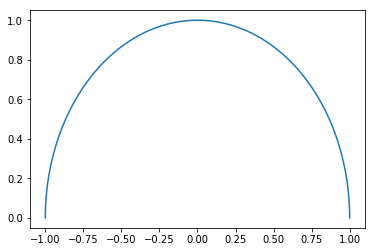

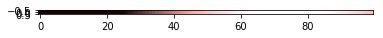

In [6]:
#Unit test
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    normals = np.concatenate([
        [np.sin( np.deg2rad(np.linspace(-90, 90, 100)) )],
        [np.cos( np.deg2rad(np.linspace(-90, 90, 100)) )],
        np.zeros((1, 100)),
    ], axis=0).transpose()
    view_directions = np.array([[0,0,-1]])
    
    plt.figure(figsize=(6,4))
    plt.plot(normals[:,0], normals[:,1])
    plt.show()

    light_directions = np.array([[0.7071067811865476, 0.7071067811865476, 0]])
    
    color = np.array([1., .1, .1])
    shininess=1.
    ambient_color = np.array([.1,  .1, .1])
    diffuse_color = np.array([.5, .5, .5])
    specular_color = np.array([1., 1, 1.])
    
    shadow = t.tensor([False]*100, dtype=torch.bool)
    
    variables = [
        'view_directions', 'normals', 'light_directions', 'color', 
        'shininess', 'ambient_color', 'diffuse_color', 'specular_color'
    ]
    for var in variables:
        exec( var + '=t.tensor(' + var + ')')
        
    pixels = phong(view_directions, normals, light_directions, shadow, color, shininess, ambient_color, diffuse_color, specular_color )
    pixels = pixels.cpu().numpy()
    plt.imshow(pixels[None,:,:])
    plt.show()